In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

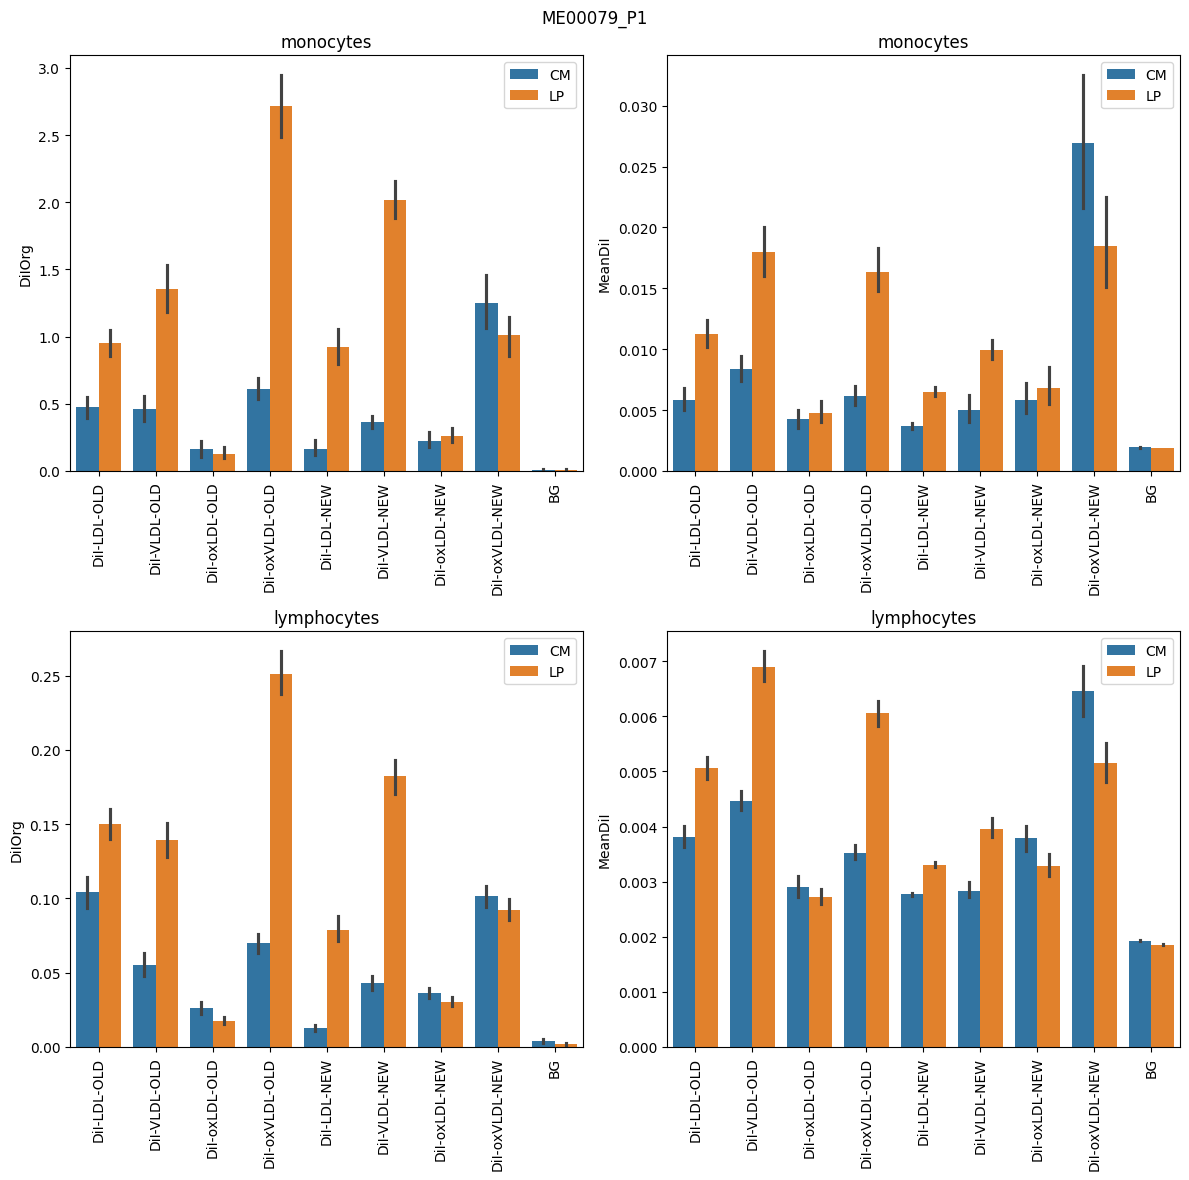

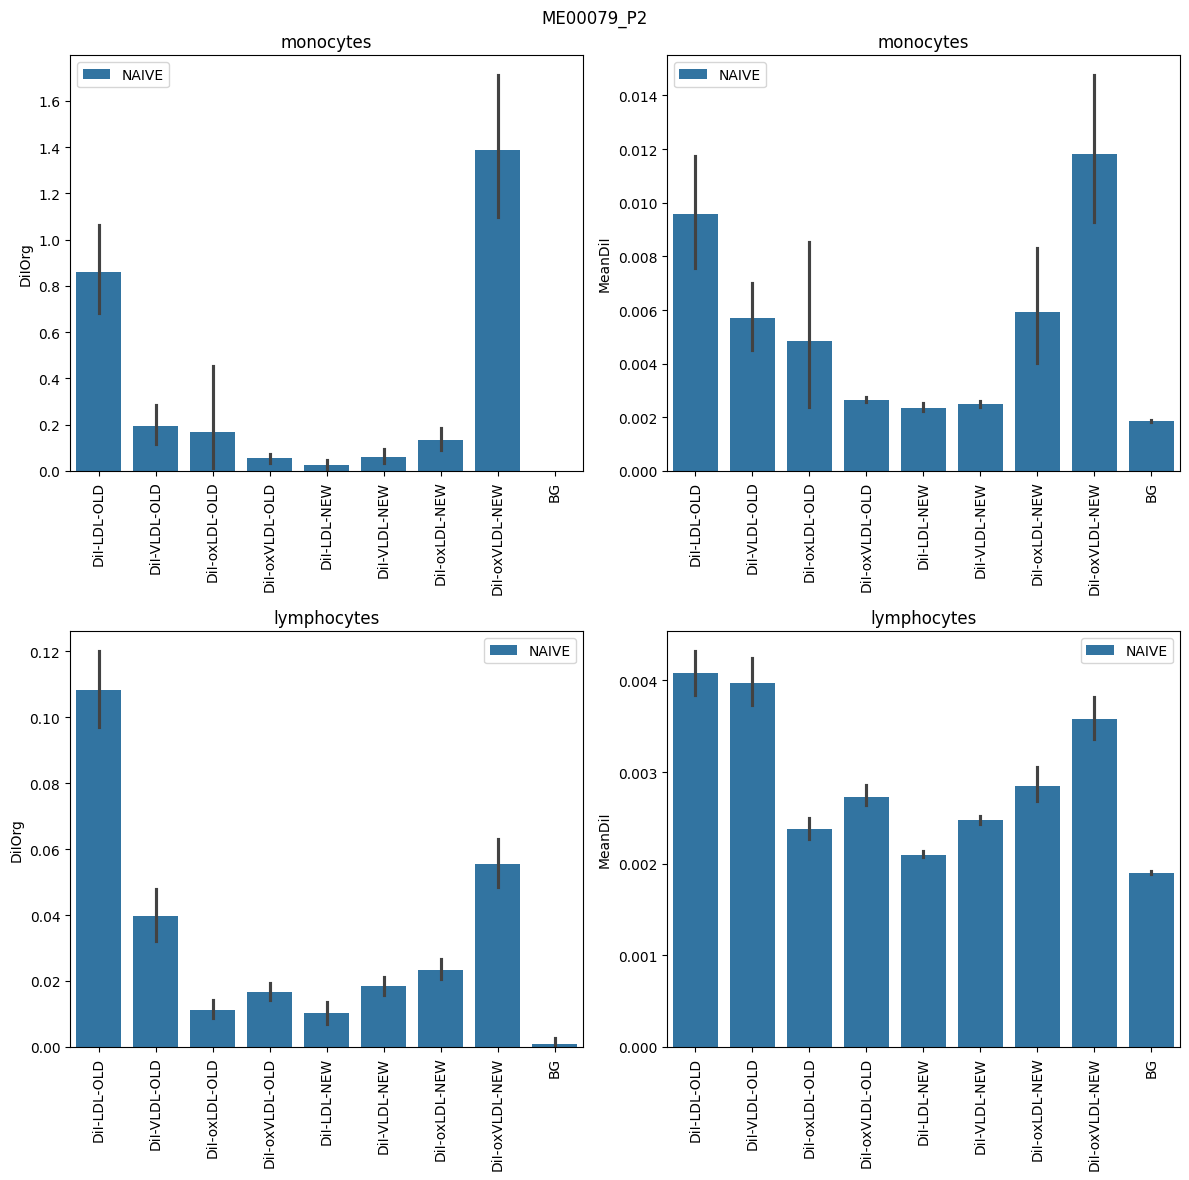

In [14]:
run_name = 'ME00079'
directory = f'/home/siina/Documents/projects/{run_name}'
sel_readouts = ['DiIOrg', 'MeanDiI']
data_dir = os.path.join(directory,'out_results/single_cell_cleaned')
save_dir = os.path.join(directory,'Figures')

for exp in ['P1','P2']:
    #exp = 'P1'
    exp_name = run_name + '_' + exp
    # Cleaned data
    df = pd.read_csv(os.path.join(data_dir,f'{exp_name}_cell_clean.csv'))
    # Description
    desc = pd.read_csv(os.path.join(directory,f'description_files/{run_name}.csv'))
    # Order of labels
    desc = desc.sort_values(by='Number')
    order = desc['Label'].dropna().values.tolist()
    # add label from description file
    df = pd.merge(df,desc[['Number','Label']],left_on = 'Sample', right_on = 'Number', how='left')
    # Plot
    fig, axes = plt.subplots(2,2,figsize = (12,12))
    fig.subplots_adjust(hspace=0.5)
    i=0
    for cell in ['monocytes','lymphocytes']:
        if cell == 'monocytes':
            df_cell = df[df['Monocyte']=='positive']
        else:
            df_cell = df[df['Monocyte']=='negative']
        for r in sel_readouts:  
            ax = axes.flat[i]
            sns.barplot(data=df_cell,x='Label',y=r, hue='treatment',order=order,ax=ax)
            #sns.barplot(data=df_cell,x='Sample',y=r, hue='treatment',ax=ax)
            ax.tick_params(axis='x', rotation=90)
            ax.set_xlabel('')
            ax.legend(title='')
            ax.set_title(cell)
            i+=1
    plt.suptitle(exp_name)
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir,f'{exp_name}.png'),dpi=300, bbox_inches='tight')

In [7]:
cell

'monocytes'

In [8]:
df_cell

,Unnamed: 0,Metadata_Filename,cell_area,DiIOrg,IntDiI,MeanDiI,MedDiI,Size_DiIOrg,MeanIntDiI_DiIOrg,MeanMeanDiI_DiIOrg,...,treatment,DiIOrg_pos,um_DiIOrg_size,total_DiIOrg_size,um_total_DiIOrg_size,total_DiI_meanint_of_DiIOrg,total_DiI_meanmean_of_DiIOrg,total_DiI_meanmed_of_DiIOrg,Number,Label
422788,1,r03c03f1-ch2_MIP.tiff,5558.0,0.0,10.956359,0.001971,0.001907,NaN,NaN,NaN,...,CM,negative,NaN,NaN,NaN,NaN,NaN,NaN,1,DiI-LDL-OLD
422789,4,r03c03f1-ch2_MIP.tiff,6426.0,0.0,12.054383,0.001876,0.001846,NaN,NaN,NaN,...,CM,negative,NaN,NaN,NaN,NaN,NaN,NaN,1,DiI-LDL-OLD
422790,13,r03c03f1-ch2_MIP.tiff,5356.0,0.0,9.781064,0.001826,0.001801,NaN,NaN,NaN,...,CM,negative,NaN,NaN,NaN,NaN,NaN,NaN,1,DiI-LDL-OLD
422791,14,r03c03f1-ch2_MIP.tiff,7387.0,0.0,14.465537,0.001958,0.001938,NaN,NaN,NaN,...,CM,negative,NaN,NaN,NaN,NaN,NaN,NaN,1,DiI-LDL-OLD
422792,19,r03c03f1-ch2_MIP.tiff,5722.0,0.0,11.176577,0.001953,0.001938,NaN,NaN,NaN,...,CM,negative,NaN,NaN,NaN,NaN,NaN,NaN,1,DiI-LDL-OLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451458,451442,r14c14f9-ch2_MIP.tiff,5947.0,0.0,11.088487,0.001865,0.001862,NaN,NaN,NaN,...,LP,negative,NaN,NaN,NaN,NaN,NaN,NaN,9,BG
451459,451449,r14c14f9-ch2_MIP.tiff,7733.0,0.0,14.293736,0.001848,0.001801,NaN,NaN,NaN,...,LP,negative,NaN,NaN,NaN,NaN,NaN,NaN,9,BG
451460,451454,r14c14f9-ch2_MIP.tiff,8491.0,0.0,16.564019,0.001951,0.001892,NaN,NaN,NaN,...,LP,negative,NaN,NaN,NaN,NaN,NaN,NaN,9,BG
451461,451465,r14c14f9-ch2_MIP.tiff,11300.0,0.0,21.487221,0.001902,0.001892,NaN,NaN,NaN,...,LP,negative,NaN,NaN,NaN,NaN,NaN,NaN,9,BG


In [9]:
r

(0, 'DiIOrg')